In [70]:
import pandas as pd
import lxml.html
import requests

In [71]:
res = requests.get('https://www.nytimes.com/2020/04/15/travel/q-and-a-coronavirus-travel.html?searchResultPosition=2')

root = lxml.html.fromstring(res.text)

content = root.cssselect('[itemprop="articleBody"]')[0].text_content()
content

"Since 2007, the Tourism Crisis Management Initiative at the University of Florida has studied many disasters that have threatened the travel industry, from hurricanes to the Zika virus. Beginning in January, prompted by the coronavirus-related threat in China, it began a periodic survey of Americans who travel on their perceptions of risk and anxiety related to Covid-19, and the impact of those perceptions on future travel decisions. In the latest survey, taken by 517 respondents in the first week of April, about 74 percent reported feeling anxious about travel within the United States, up nearly 300 percent since the survey project began.“We haven’t seen a global crisis that’s impacted every country globally and every facet of the tourism industry,” said Lori Pennington-Gray, the director of the Tourism Crisis Management Initiative.In an interview, Ms. Pennington-Gray shared the results of her ongoing surveys. The following transcript has been edited and condensed for clarity.In a la

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

tdm = cv.fit_transform([content]).toarray()

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat})

df.sort_values('freq', ascending=False).head(20)

,word,freq
66,block,46
70,briefing,46
339,styln,25
360,travel,21
151,font,13
264,people,11
325,size,10
84,color,10
234,margin,10
68,border,8


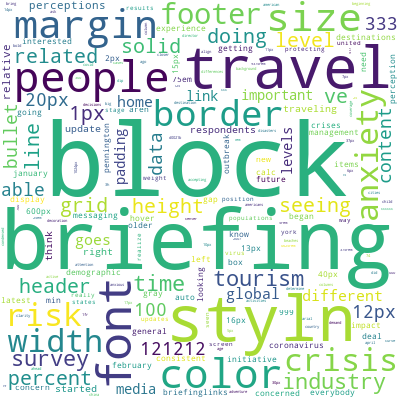

In [77]:
from wordcloud import WordCloud

wc = WordCloud(width=400, height=400, background_color='white')

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
frequencies

wc.fit_words(frequencies)

wc.to_image()